<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/02.PAC_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PAC Learning

PAC stands for 'Probably Approximately Correct'. PAC gives you the confidence and the correctness for the hypothesis.

This short lecture is an excellent learning material for PAC Learning [Probably Approximately Correct (PAC)Learning ( KTU CS467 Machine Learning Module 2)](https://youtu.be/fTWm2S5tFCo).

## Derivation of the PAC inequality

The goal of PAC is to estimate the number of samples required for the given accuracy goal (1 - $ \epsilon $) and confidence (1 - $ \delta$).
The PAC inequality is thus:

$$ P \{ C \Delta h \leq \epsilon \} \geq 1 - \delta $$

- C: Class/Concept
- h: hypothesis
- $ C \Delta h $: difference between C and h (Error)
- $ \epsilon $: error uppperbound
  - $ (1 - \epsilon) $: accuracy target
- $ \delta $: probability of failure
  - $ (1 - \delta) $: confidence

In our example, assuming that we draw the tightest rectangle as the hypothesis (yellow rectangle) and the real class C is the outer rectangle (green rectangle), the error is the area between the two rectangles. Any data points falling in this area will be incorrectly classified by the hypothesis (false negative: the hypothesis says it is a negative case but is not).

We want to make sure that The probability of a positive example falling in one of the error areas is at most $ \epsilon / 4 $.

- $ \epsilon / 4 $: Since $ \epsilon $ is the error upperbound, one strip of the error area needs to be at most $ \epsilon / 4 $ (greyed area).
- $ (1 - \epsilon / 4) $: The probability that a randomly drawn sample to be not in one of the error strips.
- $ (1 - \epsilon / 4)^N $: The combined probability that N number of samples will miss one error strip since they are all independent.
- $ 4(1 - \epsilon / 4)^N $: The combined probability for all N samples to miss all 4 error strips.

We would like $ 4(1 - \epsilon / 4)^N $ to be at most $ \delta $. Thus the inequality is:


$$ 4(1 - \epsilon / 4)^N \leq \delta $$

Diving by 4 on both sides gives us:
$$ (1 - \epsilon / 4)^N \leq \delta / 4 $$

What we need to know is N (number of required samples) so let's try to isolate N.

To do that, let's use the inequality:

$$ (1 - x) \leq e^{-x} $$

This can be quickly verified: 

In [1]:
import math

x = -4
print("{} <= {}".format(1 - x, math.exp(-x)))

x = -1
print("{} <= {}".format(1 - x, math.exp(-x)))

x = 0
print("{} <= {}".format(1 - x, math.exp(-x)))

x = 4
print("{} <= {}".format(1 - x, math.exp(-x)))

5 <= 54.598150033144236
2 <= 2.718281828459045
1 <= 1.0
-3 <= 0.01831563888873418


Substituting x with $ \epsilon / 4 $ the lefthand of the inequality is replaced with the righthand of this inequality:

$$ (1 - \epsilon / 4)^N \leq (e^{-\epsilon / 4})^N $$

Thus,
$$ e^{-N (\epsilon / 4)} \leq \frac{\delta}{4} $$

Taking the log on both sides gives us:

$$ \ln e^{-N (\epsilon / 4)} \leq \ln \frac{\delta}{4} $$

Now we need to solve the inequality involving logarithms. Here is a [cheat sheet](https://study.com/academy/lesson/how-to-solve-logarithmic-exponential-inequalities.html) on how to do it.

Using the method, the inequality becomes:

$$ -N (\epsilon / 4)\ln e \leq \ln \frac{\delta}{4} $$

Since $ \ln e = 1 $, we can simply it as:

$$ -N (\epsilon / 4) \leq \ln \frac{\delta}{4} $$

THen multiplying both sides with $ 4/\epsilon $ and getting rid of the negative sign on the left switches the inequality sign to arrive at this formula:

$$ N \geq \frac{4}{\epsilon} \ln \frac{\delta}{4} $$

Finally, we have a handy formula to calculate the number of sample required to achieve the target confidence ($1 - \delta$) and the accuracy ($1 - \epsilon$).

## Plotting C & h

In [2]:
import matplotlib.patches as patches

COLORS = [(0, 255/255, 0), (255/255, 255/255, 0), (255/255, 0, 0)]

def create_patch_rectangle(y, color, fill=False):
  width = (y[2] - y[0])
  height = (y[3] - y[1])
  if fill:
    return patches.Rectangle((y[0], y[1]),
                            width, height,
                            edgecolor=color,
                            facecolor='grey', fill=fill, alpha=0.3)
  else:
    return patches.Rectangle((y[0], y[1]),
                            width, height,
                            edgecolor=color, fill=fill)


Text(2.0, 2.2, 'ε/4')

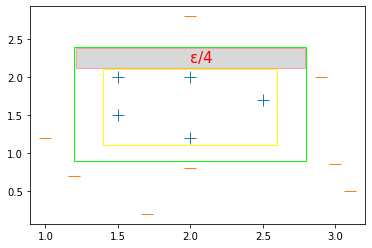

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
      # negative
      [1.,    1.2],
      [1.2,   .7],
      [2.,    .8],    
      [3.,    .85],
      [3.1,   .5],
      [2.9,   2.],
      [1.7,    .2],    
      [2.,    2.8],

      # positive
      [1.5,   1.5],
      [2,     1.2],
      [2.5,   1.7],
      [2.,    2.],
      [1.5,   2.]
    ])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, y):
  positives = X[y == 1]
  negatives = X[y == 0]

  fig, ax = plt.subplots()
  ax.plot(positives[:, 0], positives[:, 1], marker='+', linestyle='', ms=12, label='+')
  ax.plot(negatives[:, 0], negatives[:, 1], marker='_', linestyle='', ms=12, label='-')
  return ax

# plt.scatter(X[:, 0], X[:, 1])

ax = plot_data(X, y)
# x_line = np.linspace(0, 10, 100)
# y_line = -2.1*x_line + 20
PADDING = 0.01
rect1 = create_patch_rectangle((1.2, 2.4, 2.8, .9), COLORS[0])
rect2 = create_patch_rectangle((1.4, 2.1, 2.6, 1.1), COLORS[1])
rect3 = create_patch_rectangle((1.2 + PADDING, 2.4 - PADDING*2,
                                2.8 - PADDING, 2.1 + PADDING*2),
                                COLORS[2], fill=True)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)

ax.text(x=2.0,
         y=2.2,
         s=chr(949) + '/4',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='white',alpha=0))

# ax.plot(x_line, y_line, 'g', label='y=wx+b')

## Example
If we use a rectangle hypothesis model to learn a concept with 99% correctness ($\epsilon = 0.01$) with a probability of 95% ($\delta = 0.05$), what is the minimum number of training samples?

Plugging the numbers in the above formula, give us:

$$ \frac{4}{\epsilon}\ln\frac{4}{\delta} = \frac{4}{0.01}\ln\frac{4}{0.05} = 1752.8 $$

In other words, you need at least 1753 training samples.

In [4]:
epsilon = 0.01
delta = 0.05

4/epsilon * math.log(4/delta)

1752.8106538695524

# Appendix


## How to print Greek alphabets in Python

In [ ]:
greek_letterz=[(chr(code), code) for code in range(945,970)]

print(greek_letterz)

[('α', 945), ('β', 946), ('γ', 947), ('δ', 948), ('ε', 949), ('ζ', 950), ('η', 951), ('θ', 952), ('ι', 953), ('κ', 954), ('λ', 955), ('μ', 956), ('ν', 957), ('ξ', 958), ('ο', 959), ('π', 960), ('ρ', 961), ('ς', 962), ('σ', 963), ('τ', 964), ('υ', 965), ('φ', 966), ('χ', 967), ('ψ', 968), ('ω', 969)]
